### Import Library


In [ ]:
import csv
import os
import pandas as pd
import string
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
from google.colab import files
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.model_selection import train_test_split
import shutil

In [ ]:
print("Versi TensorFlow saat ini:", tf.__version__)

Versi TensorFlow saat ini: 2.12.0


### Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases'
train_csv_path = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/train_classes.csv'
test_csv_path = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/test_classes.csv'
all_dataset = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun'

Mounted at /content/drive


In [ ]:
for filename in os.listdir(dataset_path):
    print(filename)

test
train


In [ ]:
for filename in os.listdir(all_dataset):
    print(filename)

train_classes.csv
test_classes.csv
coffee-leaf-diseases
working
dataset_fix


In [ ]:
train_class =  pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/train_classes.csv')
print("Train Classes")
print("=============")
print("All ", train_class.count())
print("Miner ", train_class[train_class.miner > 0 ].count())
print("Rust ", train_class[train_class.rust > 0 ].count())
print("Phoma ", train_class[train_class.phoma > 0 ].count())
print("None ", train_class[(train_class.miner == 0) & (train_class.rust == 0) & (train_class.phoma == 0) ].count())

test_class =  pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/test_classes.csv')
print("Test Classes")
print("=============")
print("All ", test_class.count())
print("Miner ", test_class[test_class.miner > 0 ].count())
print("Rust ", test_class[test_class.rust > 0 ].count())
print("Phoma ", test_class[test_class.phoma > 0 ].count())
print("None ", test_class[(test_class.miner == 0) & (test_class.rust == 0) & (test_class.phoma == 0) ].count())

Train Classes
All  id       1264
miner    1264
rust     1264
phoma    1264
dtype: int64
Miner  id       332
miner    332
rust     332
phoma    332
dtype: int64
Rust  id       308
miner    308
rust     308
phoma    308
dtype: int64
Phoma  id       388
miner    388
rust     388
phoma    388
dtype: int64
None  id       284
miner    284
rust     284
phoma    284
dtype: int64
Test Classes
All  id       400
miner    400
rust     400
phoma    400
dtype: int64
Miner  id       128
miner    128
rust     128
phoma    128
dtype: int64
Rust  id       72
miner    72
rust     72
phoma    72
dtype: int64
Phoma  id       96
miner    96
rust     96
phoma    96
dtype: int64
None  id       116
miner    116
rust     116
phoma    116
dtype: int64


In [ ]:
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesm/miner')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesm/nominer')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesm/miner')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesm/nominer')

os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesr/rust')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesr/norust')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesr/rust')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesr/norust')

os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesp/phoma')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesp/nophoma')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesp/phoma')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesp/nophoma')

In [ ]:
#Preparation for binary classification (miner)
trl = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/train_classes.csv')
for index, row in trl.iterrows():
    if(row['miner'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesm/miner')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesm/nominer')

tel = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/test_classes.csv')
for index, row in tel.iterrows():
    if(row['miner'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesm/miner')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesm/nominer')

#Preparation for binary classification (rust)
trl = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/train_classes.csv')
for index, row in trl.iterrows():
    if(row['rust'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesr/rust')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesr/norust')

tel = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/test_classes.csv')
for index, row in tel.iterrows():
    if(row['rust'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesr/rust')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesr/norust')

#Preparation for binary classification (phoma)
trl = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/train_classes.csv')
for index, row in trl.iterrows():
    if(row['phoma'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesp/phoma')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/train/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesp/nophoma')

tel = pd.read_csv('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/test_classes.csv')
for index, row in tel.iterrows():
    if(row['phoma'] == 1):
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesp/phoma')
    else:
        shutil.copy('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/coffee-leaf-diseases/test/'+ str(row['id']) + '.jpg', '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesp/nophoma')

In [ ]:
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/rust')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/phoma')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner')

os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/rust')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/phoma')
os.makedirs('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/miner')

In [ ]:
destination_train_miner = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner'
destination_test_miner = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/miner'
destination_train_rust = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/rust'
destination_test_rust = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/rust'
destination_train_phoma = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/phoma'
destination_test_phoma = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test/phoma'

source_miner_train = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesm/miner'
source_miner_test = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesm/miner'
source_rust_train = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesr/rust'
source_rust_test = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesr/rust'
source_phoma_train = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/train/imagesp/phoma'
source_phoma_test = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/working/test/imagesp/phoma'

for files in os.listdir(source_miner_train):
  source_file = os.path.join(source_miner_train, files)
  shutil.copy(source_file, destination_train_miner)

for files in os.listdir(source_miner_test):
  source_file = os.path.join(source_miner_test, files)
  shutil.copy(source_file, destination_test_miner)

for files in os.listdir(source_rust_train):
  source_file = os.path.join(source_rust_train, files)
  shutil.copy(source_file, destination_train_rust)

for files in os.listdir(source_rust_test):
  source_file = os.path.join(source_rust_test, files)
  shutil.copy(source_file, destination_test_rust)

for files in os.listdir(source_phoma_train):
  source_file = os.path.join(source_phoma_train, files)
  shutil.copy(source_file, destination_train_phoma)

for files in os.listdir(source_phoma_test):
  source_file = os.path.join(source_phoma_test, files)
  shutil.copy(source_file, destination_test_phoma)

### Check the Images


Sample miner image:


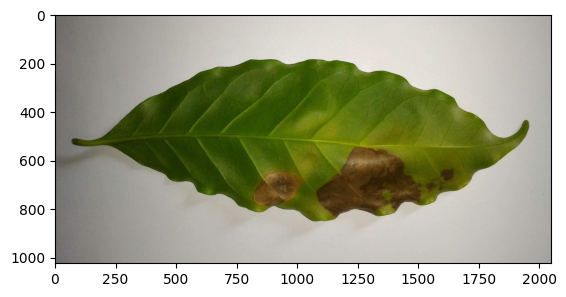


Sample rust image:


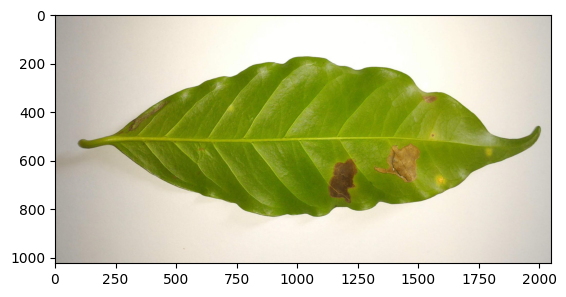

Sample phoma image:


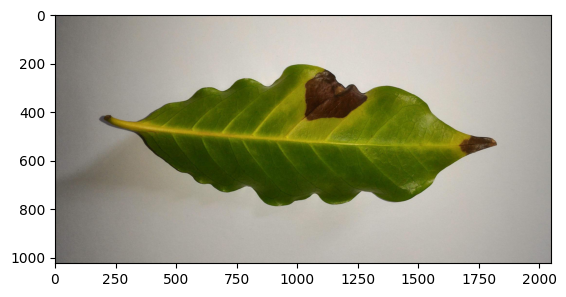

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
print("Sample miner image:")
plt.imshow(load_img(f"{os.path.join('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner', os.listdir('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner')[2])}"))
plt.show()

print("\nSample rust image:")
plt.imshow(load_img(f"{os.path.join('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/rust', os.listdir('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/rust')[2])}"))
plt.show()

print("Sample phoma image:")
plt.imshow(load_img(f"{os.path.join('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/phoma', os.listdir('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/phoma')[2])}"))
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner', os.listdir('/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train/miner')[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (1024, 2048, 3)
The maximum pixel value used is: 255.0


### Image Data Generator

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/train'
val_dir = '/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test'

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 1028 images belonging to 3 classes.
Found 296 images belonging to 3 classes.


### Transfer Learning using MobileNet v2


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
#MEMBUAT CALLBACK AGAR TRAINING BERHENTI KETIKA AKURASI YANG DIHARAPKAN SUDAH DIDAPATKAN

class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
            print(" Akurasi sudah mencapai lebih dari 90% maka train dihentikan")
            self.model.stop_training = True

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
def create_model():
  model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_19 (Dense)            (None, 128)               163968    
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dense_21 (Dense)            (None, 3)                 771       
                                                                 
Total params: 2,455,747
Trainable params: 197,763
Non-

In [ ]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[Callback()])

Epoch 1/15
33/33 [==============================] - 128s 4s/step - loss: 0.8730 - accuracy: 0.6158 - val_loss: 0.5645 - val_accuracy: 0.7669
Epoch 2/15
33/33 [==============================] - 123s 4s/step - loss: 0.5337 - accuracy: 0.7656 - val_loss: 0.6224 - val_accuracy: 0.7264
Epoch 3/15
33/33 [==============================] - 122s 4s/step - loss: 0.4209 - accuracy: 0.8366 - val_loss: 0.4345 - val_accuracy: 0.8209
Epoch 4/15
33/33 [==============================] - 123s 4s/step - loss: 0.3850 - accuracy: 0.8395 - val_loss: 0.2906 - val_accuracy: 0.8885
Epoch 5/15
33/33 [==============================] - 121s 4s/step - loss: 0.3781 - accuracy: 0.8453 - val_loss: 0.3533 - val_accuracy: 0.8818
Epoch 6/15
33/33 [==============================] - 104s 3s/step - loss: 0.3160 - accuracy: 0.8735 - val_loss: 0.4242 - val_accuracy: 0.8412
Epoch 7/15
33/33 [==============================] - 122s 4s/step - loss: 0.3283 - accuracy: 0.8609 - val_loss: 0.3503 - val_accuracy: 0.8750
Epoch 8/15
33

### Plot the Training Process

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
print("acc: ", acc[13])
print("val_acc: ", val_acc[13])

acc:  0.9231517314910889
val_acc:  0.9324324131011963


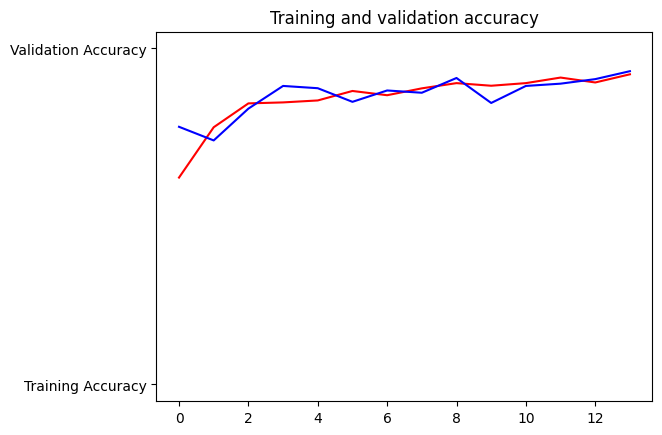

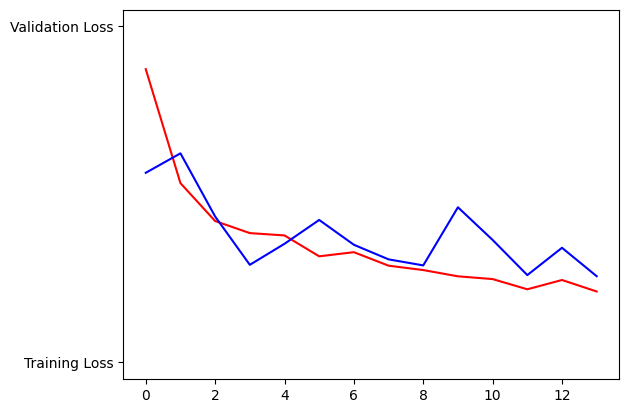

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

### Model Prediction

In [ ]:
class_names = sorted(os.listdir("/content/drive/MyDrive/Dataset_Klasifikasi_Daun/dataset_fix/test"))

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.array([x])
  images = x.astype('float32')/255.

  predictions = model.predict(images, batch_size=10)

  predicted_class = np.argmax(predictions, axis=-1)
  predicted_class_index = np.argmax(predictions[0])
  predicted_class_label = class_names[predicted_class_index]
  print(fn)
  print("Prediksi: ", predicted_class_label)

Saving Rust.jpg to Rust (1).jpg
1/1 [==============================] - 0s 59ms/step
Rust.jpg
Prediksi:  rust


### Save Model

In [ ]:
# Create directory to save the model
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/Model_Tanaman')
model.save('saved_model/Model_Tanaman.h5')

### Convert to TF Lite

In [ ]:
from tensorflow import lite
model = tf.keras.models.load_model('saved_model/Model_Tanaman.h5')
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('Model_Tanaman.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
from google.colab import files
files.download('Model_Tanaman.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>